In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [3]:
path = '/home/rabea/cedarRecordings/mental_imagery_extended_recording/Nengo_test_2019_10_13__15_47_47/Trial_0/'
files = glob.glob(path + '*.csv')

In [4]:
def get_name(filepath):
    filename = filepath.rsplit('/',1)[1]
    name = filename.rsplit('.',2)[0].rsplit('[',1)[0]
    name = name.replace('_', ' ')
    
    return name

In [5]:
modules_3d = ['Attention', 'Perception', 'Static Gain 3', 'Projection 5', 'Projection 11',
              'Projection 2', 'Projection 28', 'Projection 29', 'Static Gain 20',
              'Static Gain 41', 'Static Gain 53']
cedar_data = {}
for filepath in files:
    module_name = get_name(filepath)
    if module_name in modules_3d:
        print('Skipping %s' %module_name)
        continue
    # for the moment skip the 3-dimensional fields
    cedar_data[module_name] = pd.read_csv(filepath, skiprows=1, header=None)

Skipping Projection 2
Skipping Projection 5
Skipping Projection 29
Skipping Static Gain 3
Skipping Projection 28
Skipping Attention
Skipping Static Gain 53
Skipping Static Gain 41
Skipping Perception
Skipping Projection 11
Skipping Static Gain 20


In [6]:
colour = cedar_data['Colour']

In [43]:
def plot_1dneuralfield(nf_data, time_points):
    times = nf_data.iloc[time_points, 0]
    data = nf_data.iloc[time_points, 1:]
    plt.figure(figsize=(12,6))
    min = np.min(np.min(nf_data.iloc[:, 1:]))
    max = np.max(np.max(nf_data.iloc[:, 1:]))
    dif = max-min
    print(min, max, dif)
    
    for i, tp in enumerate(time_points):
        plt.subplot(3,5,i+1)
        plt.title(times.iloc[i])
        plt.plot(data.iloc[i])
        plt.ylim(min-0.1*dif, max+0.1*dif)
        
    plt.tight_layout()
    plt.show()
    
def plot_2dneuralfield(nf_data, time_points, colorbar=False):
    plt.figure(figsize=(10, 5))
    
    times = nf_data.iloc[time_points, 0]
    data = nf_data.iloc[time_points, 1:]
    # plot 15 points in time 
    for i, time_point in enumerate(time_points):
        plt.subplot(3,5,i+1)
        plt.imshow(np.array(data.iloc[i]).reshape(50,50), cmap='jet')
        plt.title(times.iloc[i])
        plt.xticks([])
        plt.yticks([])
        if colorbar:
            plt.colorbar()
    plt.show()

In [98]:
time_points = np.linspace(600,800,15, dtype=int)

tps_1d = np.arange(54,54+15*3,3) * 6 + 10

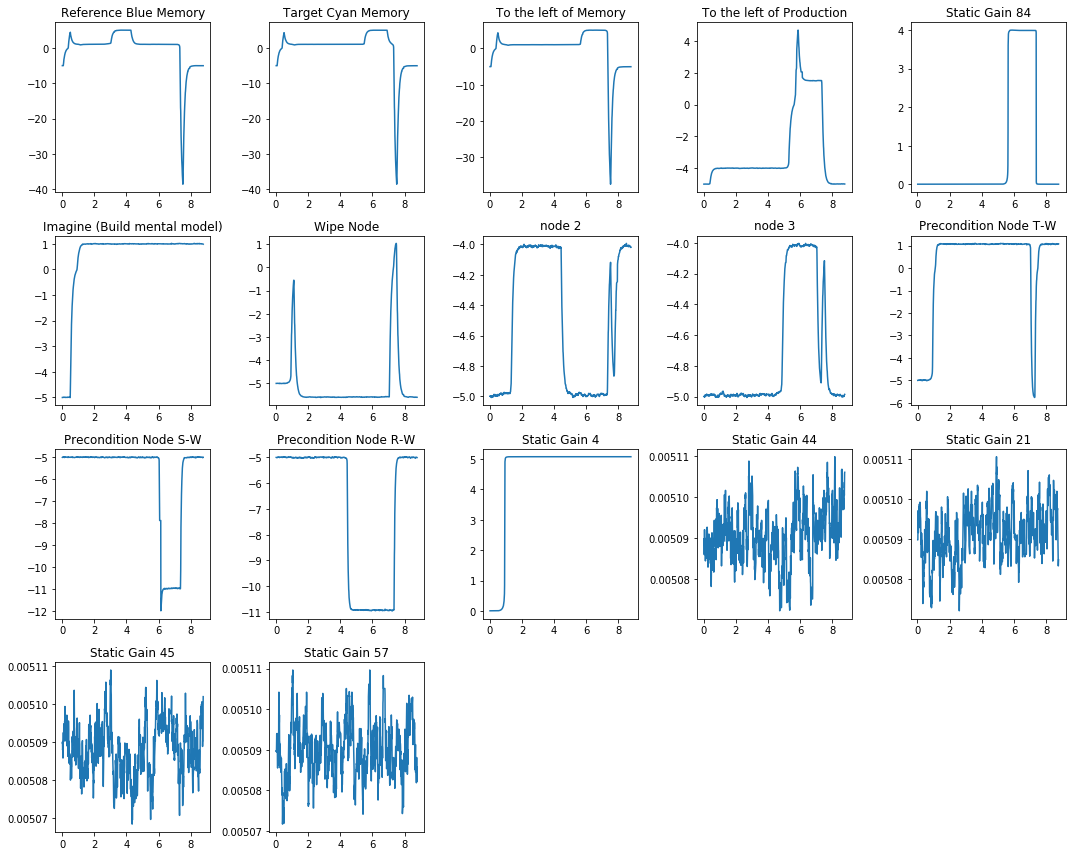

In [92]:
plot_1d = ['Reference Blue Memory', 'Target Cyan Memory', 'To the left of Memory', 
           'To the left of Production', 'Static Gain 84', 'Imagine (Build mental model)',
           'Wipe Node', 'node 2', 'node 3', 'Precondition Node T-W', 'Precondition Node S-W',
           'Precondition Node R-W', 'Static Gain 4', 'Static Gain 44', 'Static Gain 21',
           'Static Gain 45', 'Static Gain 57']

plt.figure(figsize=(15,12))
for i, name in enumerate(plot_1d):
    plt.subplot(4,5,i+1)
    
    x = cedar_data[name][0]
    x = [float(t.rsplit(' ', 1)[0]) for t in x]
    plt.plot(x, cedar_data[name][1])
    name_split = name.rsplit('.',1)
    if len(name_split) > 1:
        plt.title(name_split[1])
    else:
        plt.title(name)

plt.tight_layout()
plt.show()


## Group Target Behavior

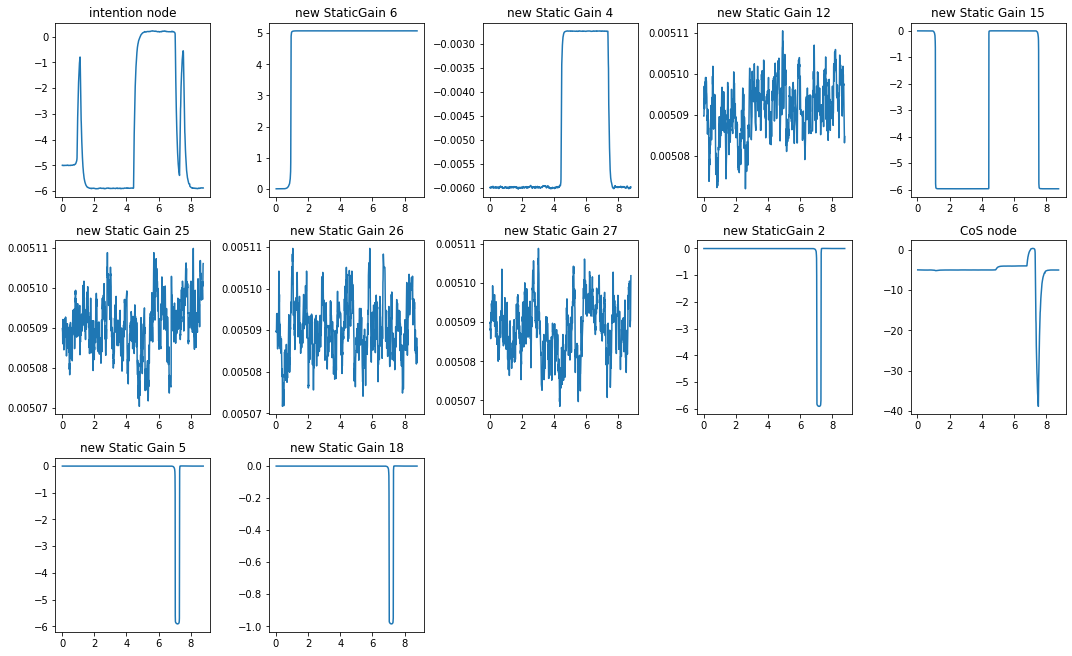

In [75]:
target_behavior_nodes = ['Target Behavior.intention node',
           'Target Behavior.new StaticGain 6', 'Target Behavior.new Static Gain 4',
           'Target Behavior.new Static Gain 12', 'Target Behavior.new Static Gain 15',
           'Target Behavior.new Static Gain 25', 'Target Behavior.new Static Gain 26',
           'Target Behavior.new Static Gain 27', 'Target Behavior.new StaticGain 2',
           'Target Behavior.CoS node', 'Target Behavior.new Static Gain 5', 
            'Target Behavior.new Static Gain 18']

plt.figure(figsize=(15,12))
for i, name in enumerate(target_behavior_nodes):
    plt.subplot(4,5,i+1)
    
    x = cedar_data[name][0]
    x = [float(t.rsplit(' ', 1)[0]) for t in x]
    plt.plot(x, cedar_data[name][1])
    name_split = name.rsplit('.',1)
    if len(name_split) > 1:
        plt.title(name_split[1])
    else:
        plt.title(name)

plt.tight_layout()
plt.show()


## Group Reference Behavior

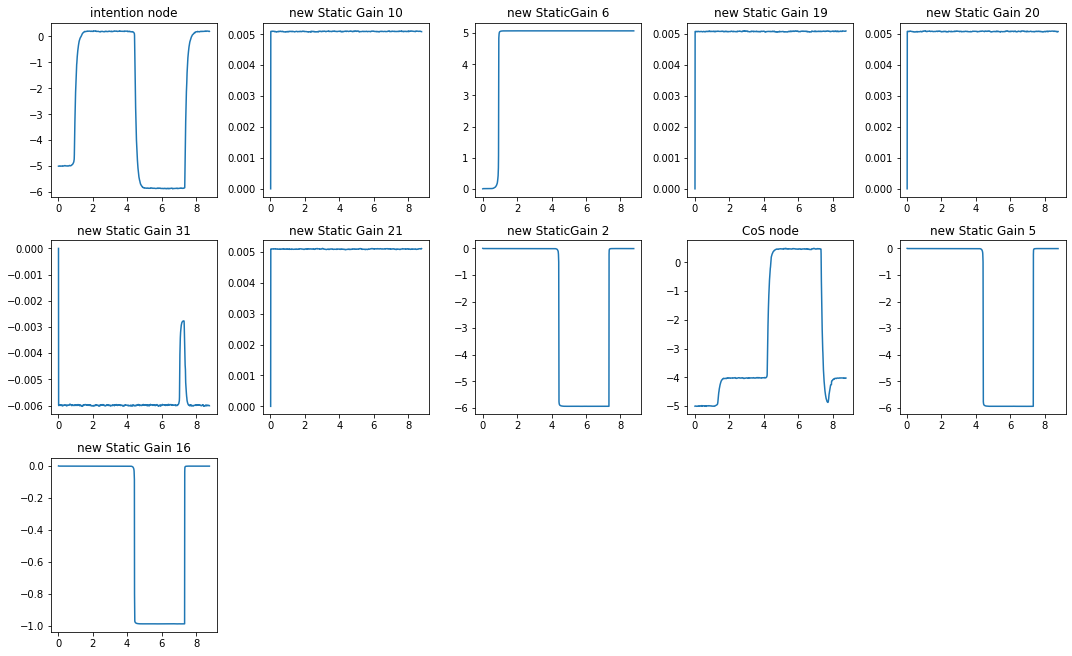

In [76]:
ref_behavior_nodes = ['Reference Behavior.intention node', 'Reference Behavior.new Static Gain 10',
                     'Reference Behavior.new StaticGain 6', 'Reference Behavior.new Static Gain 19',
                     'Reference Behavior.new Static Gain 20', 'Reference Behavior.new Static Gain 31',
                     'Reference Behavior.new Static Gain 21', 'Reference Behavior.new StaticGain 2',
                     'Reference Behavior.CoS node', 'Reference Behavior.new Static Gain 5',
                     'Reference Behavior.new Static Gain 16']

plt.figure(figsize=(15,12))
for i, name in enumerate(ref_behavior_nodes):
    plt.subplot(4,5,i+1)
    
    x = cedar_data[name][0]
    x = [float(t.rsplit(' ', 1)[0]) for t in x]
    plt.plot(x, cedar_data[name][1])
    name_split = name.rsplit('.',1)
    if len(name_split) > 1:
        plt.title(name_split[1])
    else:
        plt.title(name)

plt.tight_layout()
plt.show()

## Group Target Field & Target Production Nodes

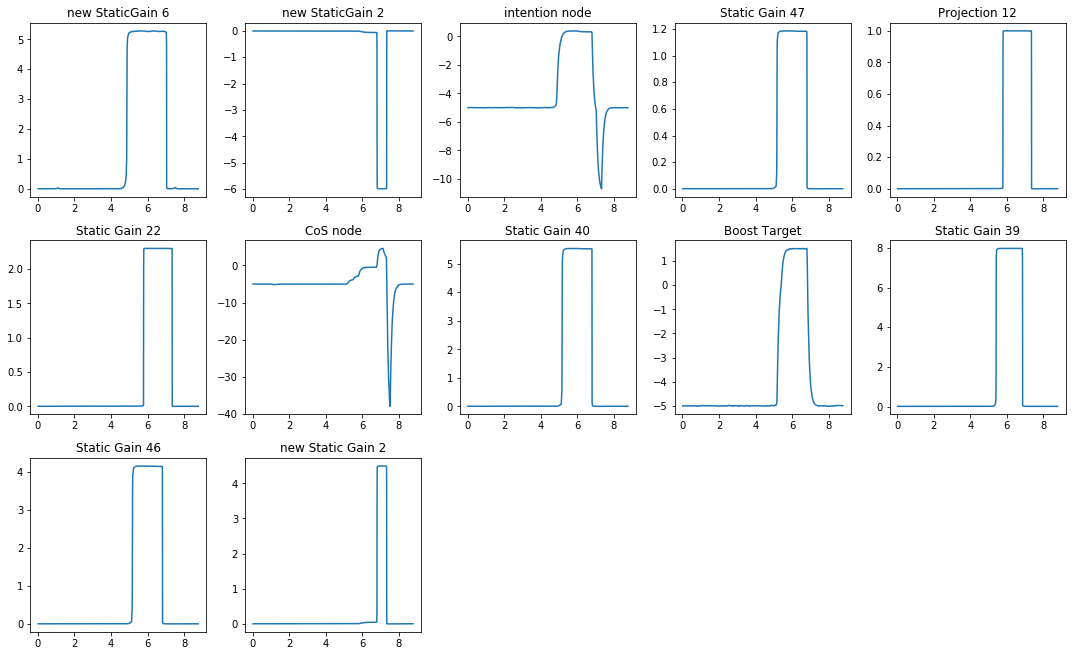

In [77]:
group_names = ['Target Field & Target Production Nodes.new StaticGain 6',
               'Target Field & Target Production Nodes.new StaticGain 2',
              'Target Field & Target Production Nodes.intention node',
              'Target Field & Target Production Nodes.Static Gain 47',
              'Target Field & Target Production Nodes.Projection 12',
              'Target Field & Target Production Nodes.Static Gain 22',
              'Target Field & Target Production Nodes.CoS node',
              'Target Field & Target Production Nodes.Static Gain 40',
              'Target Field & Target Production Nodes.Boost Target',
              'Target Field & Target Production Nodes.Static Gain 39',
              'Target Field & Target Production Nodes.Static Gain 46',
              'Target Field & Target Production Nodes.new Static Gain 2']

plt.figure(figsize=(15,12))
for i, name in enumerate(group_names):
    plt.subplot(4,5,i+1)
    
    x = cedar_data[name][0]
    x = [float(t.rsplit(' ', 1)[0]) for t in x]
    plt.plot(x, cedar_data[name][1])
    name_split = name.rsplit('.',1)
    if len(name_split) > 1:
        plt.title(name_split[1])
    else:
        plt.title(name)

plt.tight_layout()
plt.show()

## Group Reference Field & Reference Production Nodes

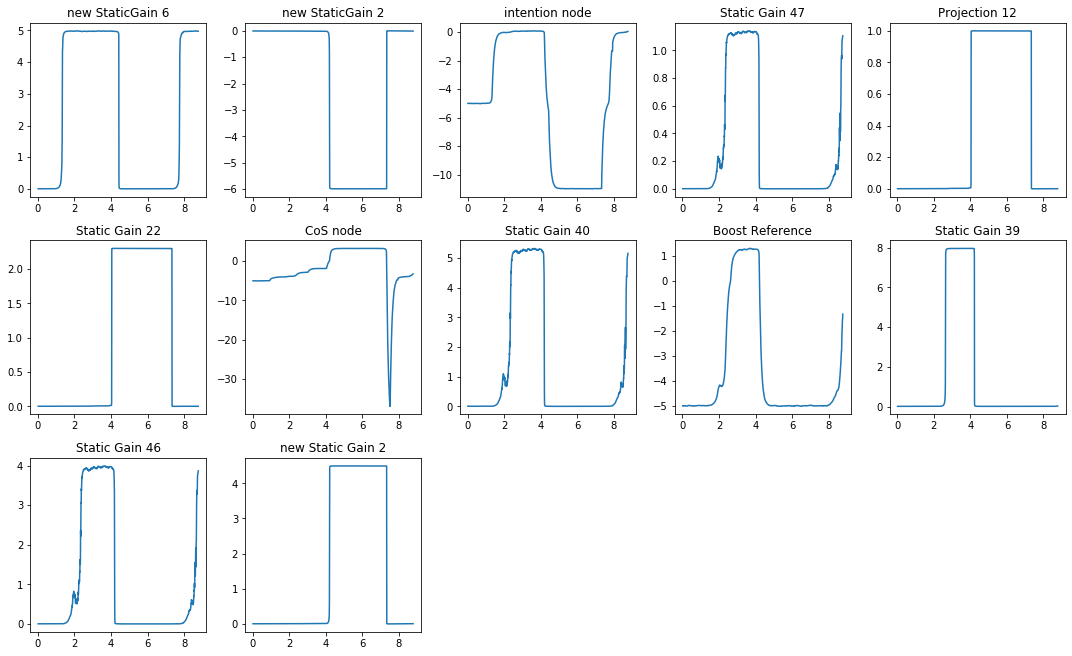

In [81]:
names = ['Reference Field & Reference Production Nodes.new StaticGain 6',
        'Reference Field & Reference Production Nodes.new StaticGain 2',
        'Reference Field & Reference Production Nodes.intention node',
        'Reference Field & Reference Production Nodes.Static Gain 47',
        'Reference Field & Reference Production Nodes.Projection 12',
        'Reference Field & Reference Production Nodes.Static Gain 22',
        'Reference Field & Reference Production Nodes.CoS node',
        'Reference Field & Reference Production Nodes.Static Gain 40',
        'Reference Field & Reference Production Nodes.Boost Reference',
        'Reference Field & Reference Production Nodes.Static Gain 39',
        'Reference Field & Reference Production Nodes.Static Gain 46',
        'Reference Field & Reference Production Nodes.new Static Gain 2']

plt.figure(figsize=(15,12))
for i, name in enumerate(names):
    plt.subplot(4,5,i+1)
    
    x = cedar_data[name][0]
    x = [float(t.rsplit(' ', 1)[0]) for t in x]
    plt.plot(x, cedar_data[name][1])
    name_split = name.rsplit('.',1)
    if len(name_split) > 1:
        plt.title(name_split[1])
    else:
        plt.title(name)

plt.tight_layout()
plt.show()

## Group Relational Behavior

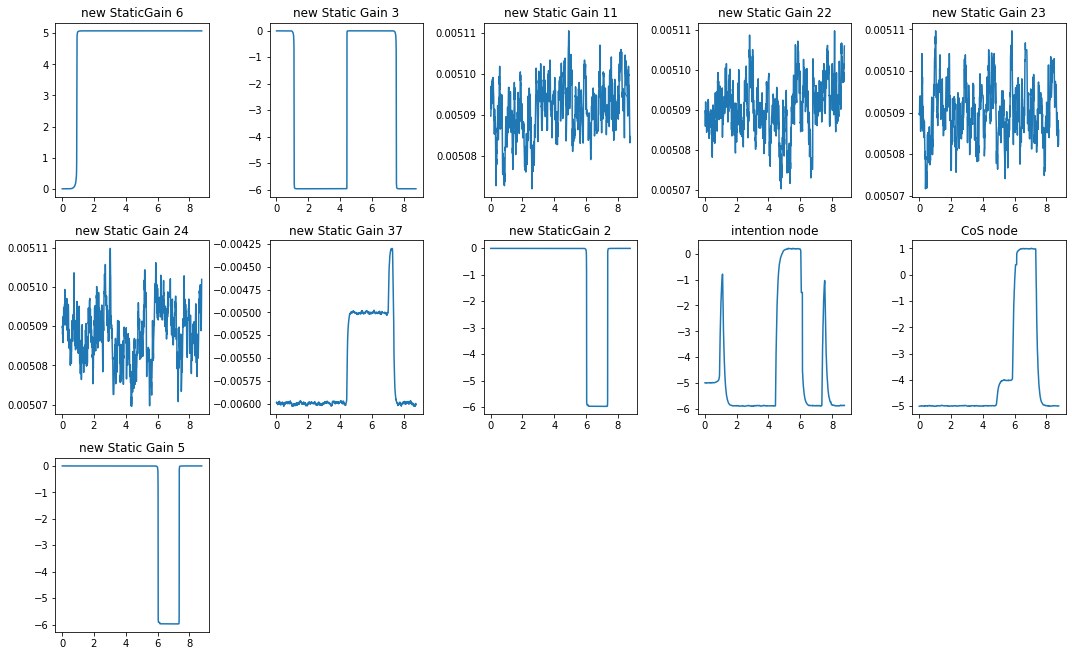

In [82]:
names = ['Relational Behavior.new StaticGain 6',
        'Relational Behavior.new Static Gain 3',
        'Relational Behavior.new Static Gain 11',
        'Relational Behavior.new Static Gain 22',
        'Relational Behavior.new Static Gain 23',
        'Relational Behavior.new Static Gain 24',
        'Relational Behavior.new Static Gain 37',
        'Relational Behavior.new StaticGain 2',
        'Relational Behavior.intention node',
        'Relational Behavior.CoS node',
        'Relational Behavior.new Static Gain 5']

plt.figure(figsize=(15,12))
for i, name in enumerate(names):
    plt.subplot(4,5,i+1)
    
    x = cedar_data[name][0]
    x = [float(t.rsplit(' ', 1)[0]) for t in x]
    plt.plot(x, cedar_data[name][1])
    name_split = name.rsplit('.',1)
    if len(name_split) > 1:
        plt.title(name_split[1])
    else:
        plt.title(name)

plt.tight_layout()
plt.show()

## Group OC Field and Spatial Production Nodes

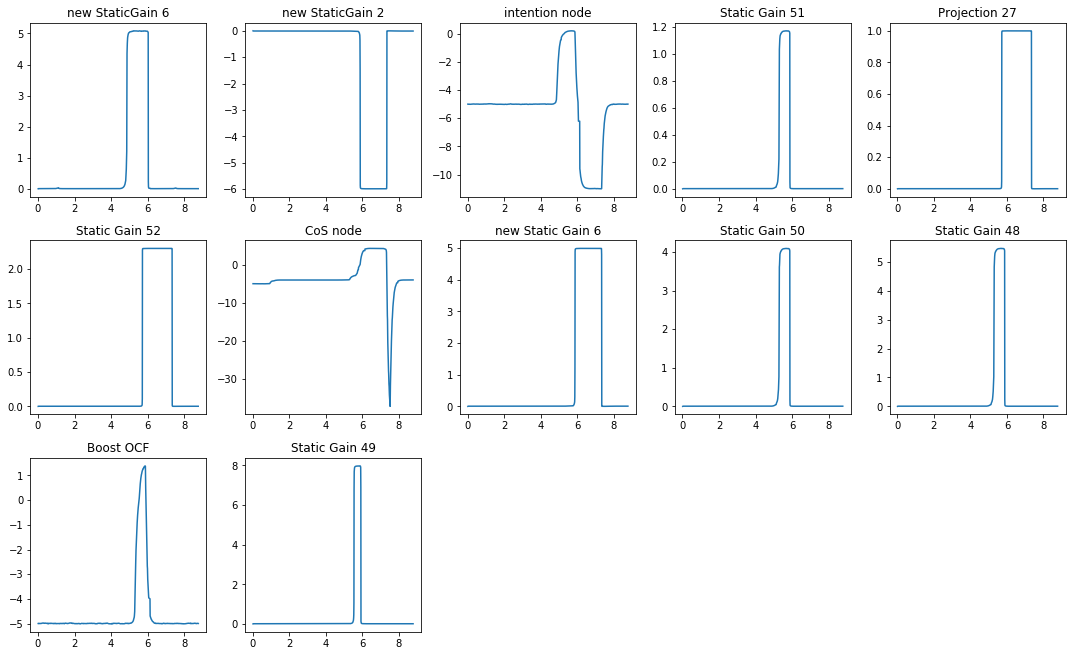

In [84]:
names = ['OC Field and Spatial Production Nodes  .new StaticGain 6',
         'OC Field and Spatial Production Nodes  .new StaticGain 2',
         'OC Field and Spatial Production Nodes  .intention node',
         'OC Field and Spatial Production Nodes  .Static Gain 51',
         'OC Field and Spatial Production Nodes  .Projection 27',
         'OC Field and Spatial Production Nodes  .Static Gain 52',
         'OC Field and Spatial Production Nodes  .CoS node',
         'OC Field and Spatial Production Nodes  .new Static Gain 6',
         'OC Field and Spatial Production Nodes  .Static Gain 50',
         'OC Field and Spatial Production Nodes  .Static Gain 48',
         'OC Field and Spatial Production Nodes  .Boost OCF',
         'OC Field and Spatial Production Nodes  .Static Gain 49']

plt.figure(figsize=(15,12))
for i, name in enumerate(names):
    plt.subplot(4,5,i+1)
    
    x = cedar_data[name][0]
    x = [float(t.rsplit(' ', 1)[0]) for t in x]
    plt.plot(x, cedar_data[name][1])
    name_split = name.rsplit('.',1)
    if len(name_split) > 1:
        plt.title(name_split[1])
    else:
        plt.title(name)

plt.tight_layout()
plt.show()

## Group Condition of Dissatisfaction

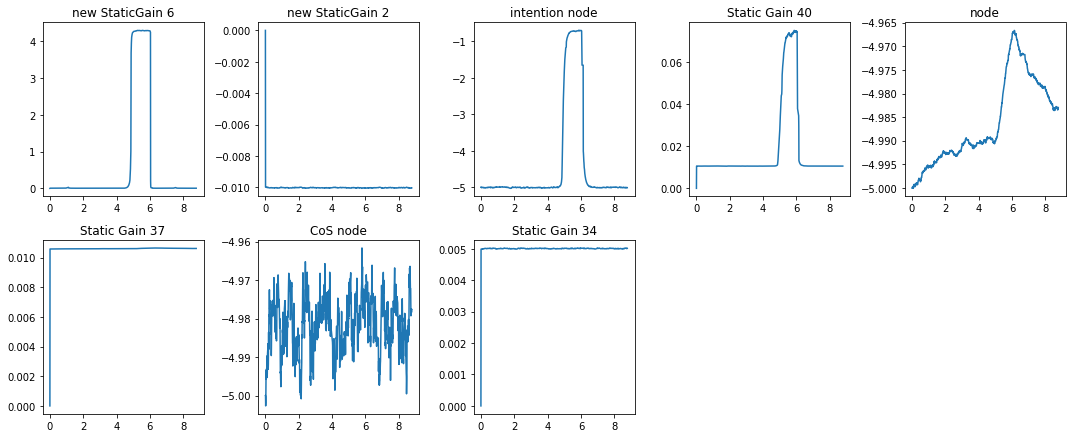

In [87]:
names = ['Condition of  Dissatisfaction .new StaticGain 6', 'Condition of  Dissatisfaction .new StaticGain 2',
         'Condition of  Dissatisfaction .intention node', 'Condition of  Dissatisfaction .Static Gain 40',
         'Condition of  Dissatisfaction .node', 'Condition of  Dissatisfaction .Static Gain 37',
         'Condition of  Dissatisfaction .CoS node', 'Condition of  Dissatisfaction .Static Gain 34']

plt.figure(figsize=(15,12))
for i, name in enumerate(names):
    plt.subplot(4,5,i+1)
    
    x = cedar_data[name][0]
    x = [float(t.rsplit(' ', 1)[0]) for t in x]
    plt.plot(x, cedar_data[name][1])
    name_split = name.rsplit('.',1)
    if len(name_split) > 1:
        plt.title(name_split[1])
    else:
        plt.title(name)

plt.tight_layout()
plt.show()

## Group Spatial Memory Nodes

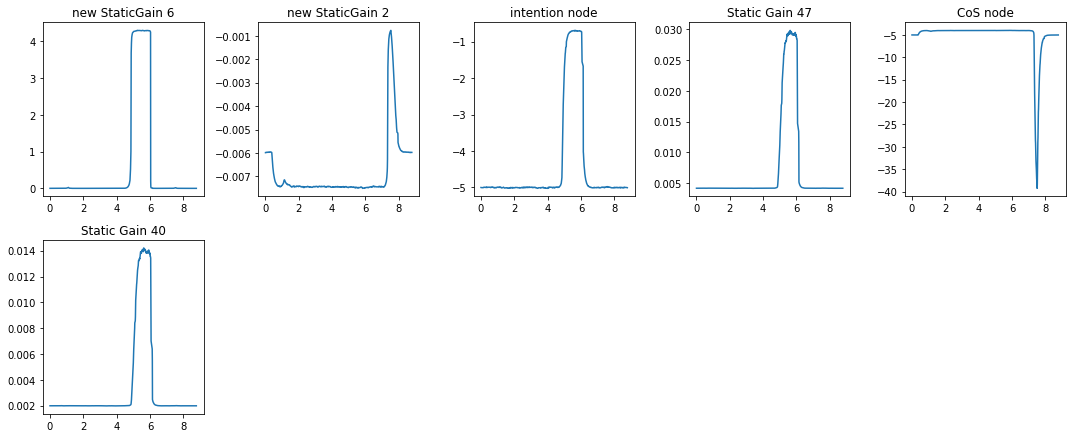

In [88]:
names = ['Spatial Memory Nodes.new StaticGain 6', 'Spatial Memory Nodes.new StaticGain 2',
         'Spatial Memory Nodes.intention node', 'Spatial Memory Nodes.Static Gain 47',
         'Spatial Memory Nodes.CoS node', 'Spatial Memory Nodes.Static Gain 40']

plt.figure(figsize=(15,12))
for i, name in enumerate(names):
    plt.subplot(4,5,i+1)
    
    x = cedar_data[name][0]
    x = [float(t.rsplit(' ', 1)[0]) for t in x]
    plt.plot(x, cedar_data[name][1])
    name_split = name.rsplit('.',1)
    if len(name_split) > 1:
        plt.title(name_split[1])
    else:
        plt.title(name)

plt.tight_layout()
plt.show()

## Group Reference Memory Nodes & Color Field

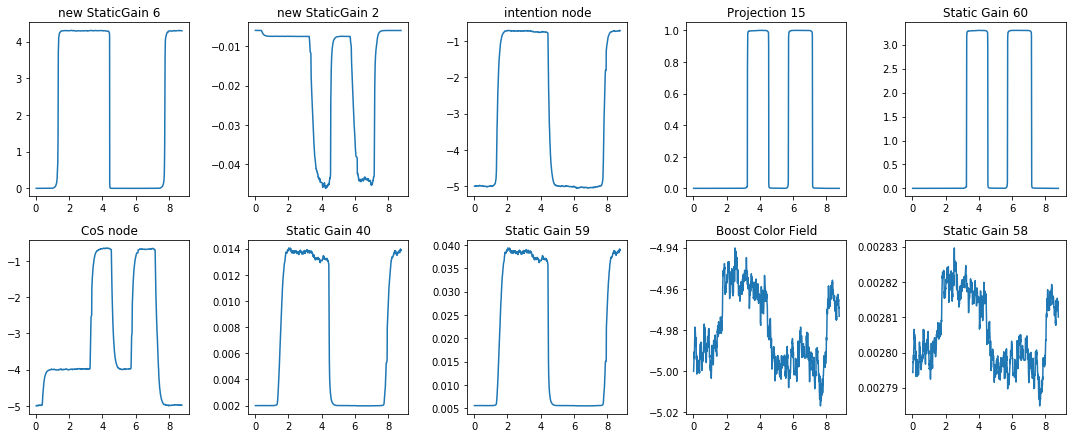

In [89]:
names = ['Reference Memory Nodes & Color Field.new StaticGain 6',
         'Reference Memory Nodes & Color Field.new StaticGain 2',
         'Reference Memory Nodes & Color Field.intention node',
         'Reference Memory Nodes & Color Field.Projection 15',
         'Reference Memory Nodes & Color Field.Static Gain 60',
         'Reference Memory Nodes & Color Field.CoS node',
         'Reference Memory Nodes & Color Field.Static Gain 40',
         'Reference Memory Nodes & Color Field.Static Gain 59',
         'Reference Memory Nodes & Color Field.Boost Color Field',
         'Reference Memory Nodes & Color Field.Static Gain 58']

plt.figure(figsize=(15,12))
for i, name in enumerate(names):
    plt.subplot(4,5,i+1)
    
    x = cedar_data[name][0]
    x = [float(t.rsplit(' ', 1)[0]) for t in x]
    plt.plot(x, cedar_data[name][1])
    name_split = name.rsplit('.',1)
    if len(name_split) > 1:
        plt.title(name_split[1])
    else:
        plt.title(name)

plt.tight_layout()
plt.show()

## Group Reference Memory Nodes & Color Field 2

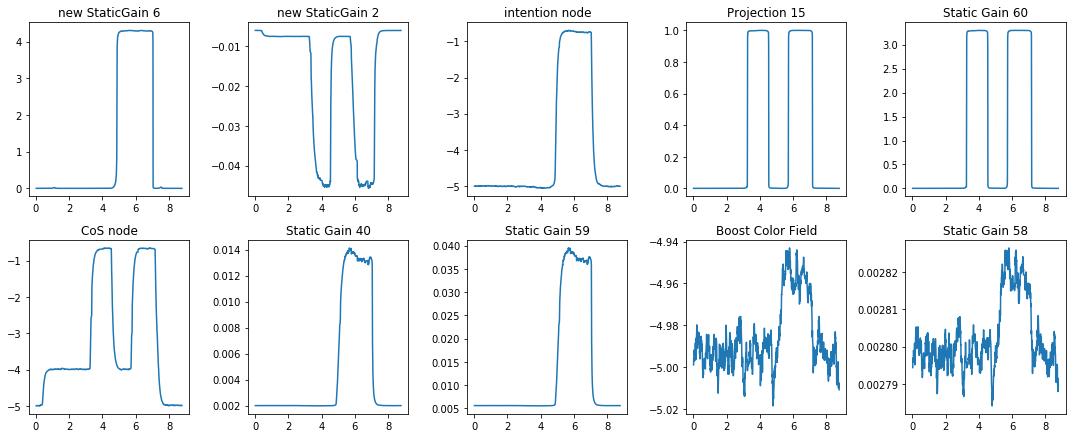

In [90]:
names = ['Reference Memory Nodes & Color Field 2.new StaticGain 6',
         'Reference Memory Nodes & Color Field 2.new StaticGain 2',
         'Reference Memory Nodes & Color Field 2.intention node',
         'Reference Memory Nodes & Color Field 2.Projection 15',
         'Reference Memory Nodes & Color Field 2.Static Gain 60',
         'Reference Memory Nodes & Color Field 2.CoS node',
         'Reference Memory Nodes & Color Field 2.Static Gain 40',
         'Reference Memory Nodes & Color Field 2.Static Gain 59',
         'Reference Memory Nodes & Color Field 2.Boost Color Field',
         'Reference Memory Nodes & Color Field 2.Static Gain 58']

plt.figure(figsize=(15,12))
for i, name in enumerate(names):
    plt.subplot(4,5,i+1)
    
    x = cedar_data[name][0]
    x = [float(t.rsplit(' ', 1)[0]) for t in x]
    plt.plot(x, cedar_data[name][1])
    name_split = name.rsplit('.',1)
    if len(name_split) > 1:
        plt.title(name_split[1])
    else:
        plt.title(name)

plt.tight_layout()
plt.show()

## Group Match Field

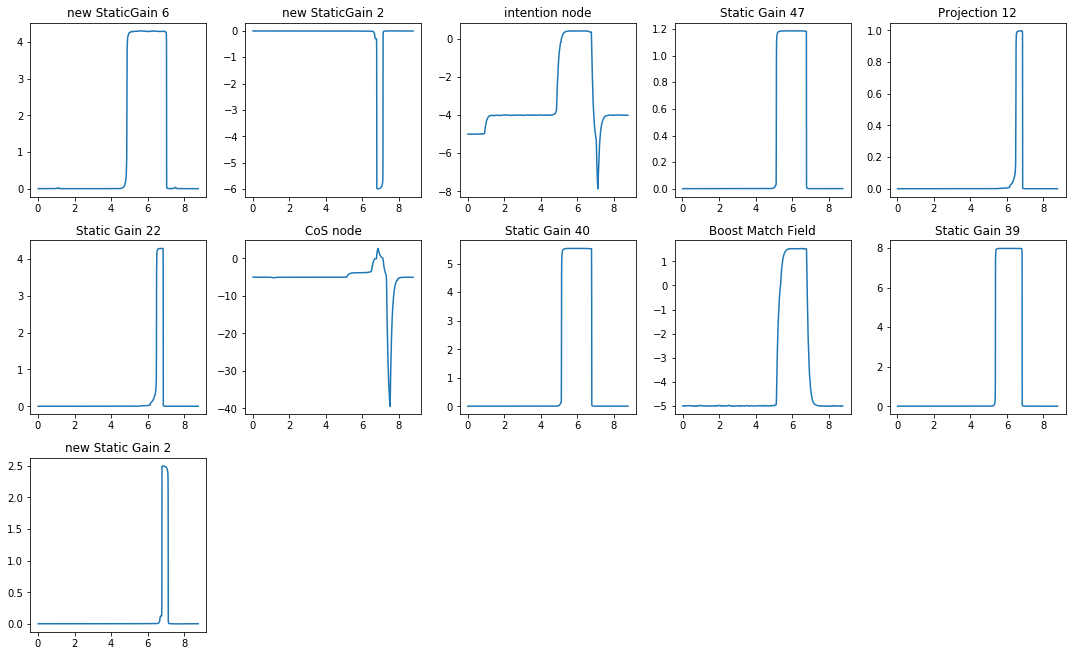

In [91]:
names = ['Match Field.new StaticGain 6', 'Match Field.new StaticGain 2', 
         'Match Field.intention node', 'Match Field.Static Gain 47', 'Match Field.Projection 12',
         'Match Field.Static Gain 22', 'Match Field.CoS node', 'Match Field.Static Gain 40',
         'Match Field.Boost Match Field', 'Match Field.Static Gain 39', 'Match Field.new Static Gain 2']

plt.figure(figsize=(15,12))
for i, name in enumerate(names):
    plt.subplot(4,5,i+1)
    
    x = cedar_data[name][0]
    x = [float(t.rsplit(' ', 1)[0]) for t in x]
    plt.plot(x, cedar_data[name][1])
    name_split = name.rsplit('.',1)
    if len(name_split) > 1:
        plt.title(name_split[1])
    else:
        plt.title(name)

plt.tight_layout()
plt.show()

## 1-dimensional color field from Plot Widget


-8.29935 8.35322 16.65257


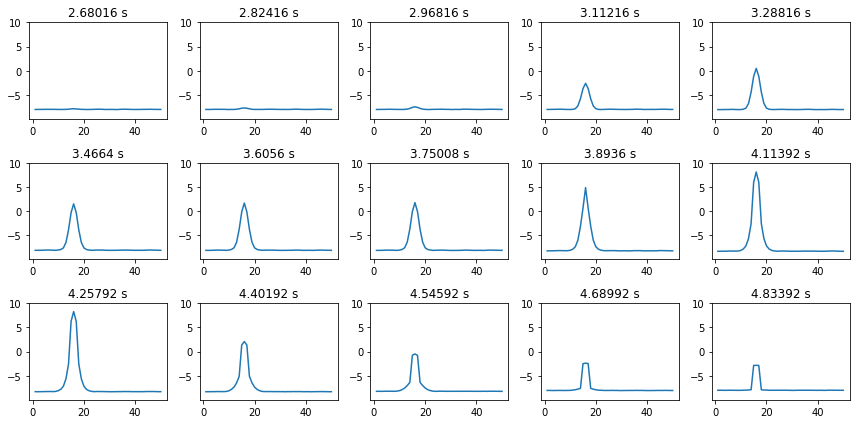

In [9]:
plot_1dneuralfield(colour, tps_1d)

## Spatial scene

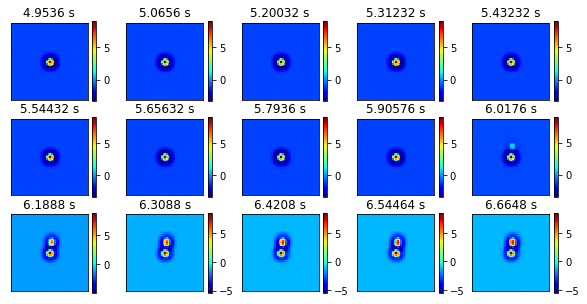

In [99]:
plot_2dneuralfield(cedar_data['Indeterminent '], time_points, True)

## Object-centered and its sources

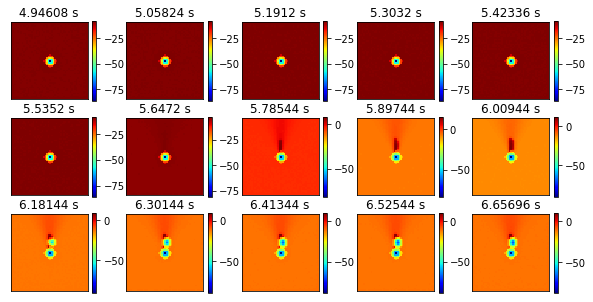

In [100]:
plot_2dneuralfield(cedar_data['Object-centered '], time_points, True)

In [96]:
# time_points = np.linspace(0,cedar_data['Spatial Template'].shape[0]-1,15, dtype=int)

# plot_2dneuralfield(cedar_data['Spatial Template'], time_points, True)

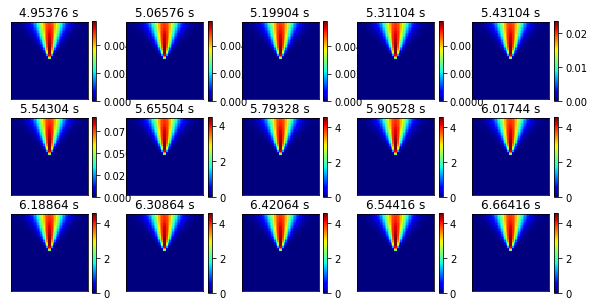

In [101]:
plot_2dneuralfield(cedar_data['Static Gain'], time_points, True)

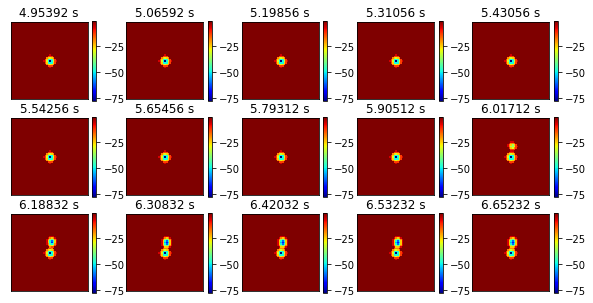

In [102]:
plot_2dneuralfield(cedar_data['Static Gain 15'], time_points, True)

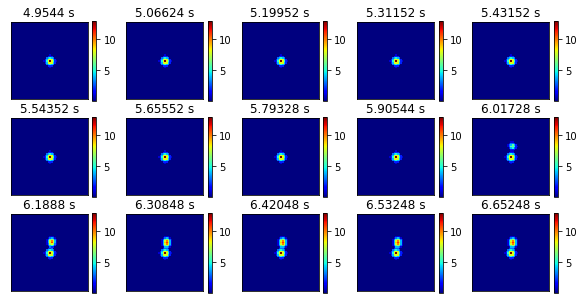

In [108]:
plot_2dneuralfield(cedar_data['Convolution 3'], time_points, True)

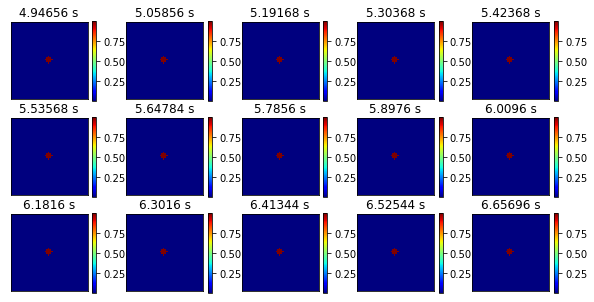

In [109]:
plot_2dneuralfield(cedar_data['Flip 3'], time_points, True)

## Target and its sources

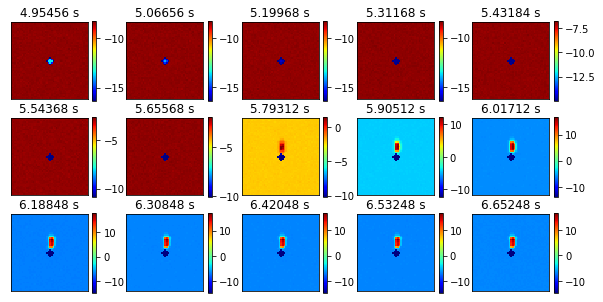

In [103]:
plot_2dneuralfield(cedar_data['Target'], time_points, True)

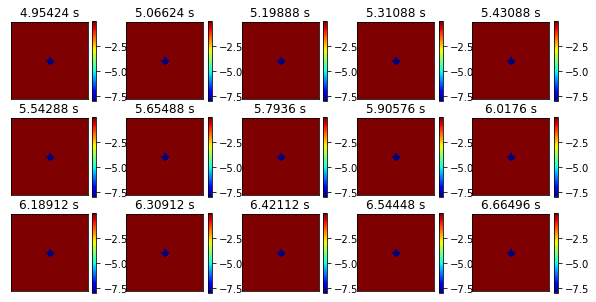

In [104]:
plot_2dneuralfield(cedar_data['Static Gain 7'], time_points, True)

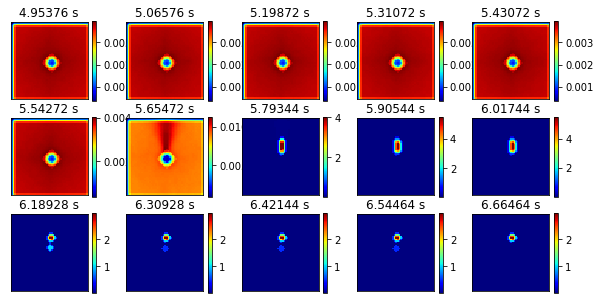

In [105]:
plot_2dneuralfield(cedar_data['Static Gain 10'], time_points, True)

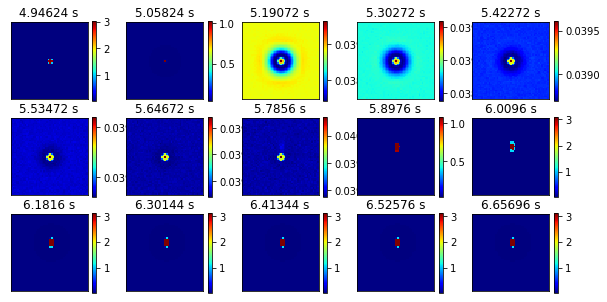

In [106]:
plot_2dneuralfield(cedar_data['Projection 9'], time_points, True)

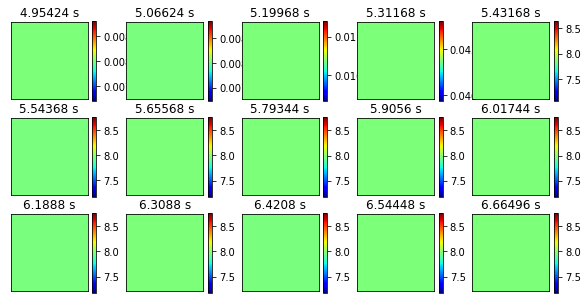

In [107]:
plot_2dneuralfield(cedar_data['Target Field & Target Production Nodes.Projection 14'], time_points, True)

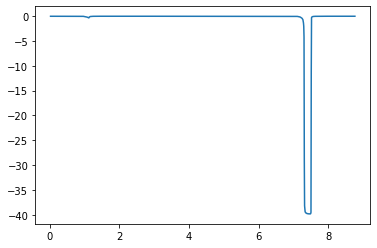

In [64]:
plt.figure()
x = cedar_data['new Static Gain 7'][0]
x = [float(t.rsplit(' ',1)[0]) for t in x]
plt.plot(x, cedar_data['new Static Gain 7'][1])
plt.show()